## Use Case - Customer Dataset : Naive Bayes Classifier

The ultimate aim of the usecase is to predict loan approval or denial status of the loan application by building the machine learning model using Naive Bayes Classifier. The customer rating dataset contains the following columns:

'APPLICATION.ID', 'DSA.ID', 'DEALER.ID', 'QUEUE.ID', 'CURRENT.STAGE',
 'MARITAL.STATUS', 'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE.TYPE',
 'CITY', 'STATE', 'ZIP.CODE', 'EMPLOY.CONSTITUTION', 'PAN.STATUS',
 'APPLICATION.SCORE', 'APPROVED.AMOUNT', 'APPLIED.AMOUNT', 'LOAN.TENOR',
 'OWN.HOUSE.TYPE', 'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE',
 'PRIMARY.ASSET.MODELNO', 'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR',
 'PAN', 'BANK_PASSBOOK', 'APPLICATION.STATUS'
 

In [154]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df=pd.read_excel('customer_dataset.xlsx')

In [4]:
df.apply(lambda x: [x.unique()])

APPLICATION.ID           [[27497000024, 25556001005, 27220000249, 27067...
DSA.ID                   [[JB02005, RD02622, SK02345, DN30900, AS22782,...
DEALER.ID                [[27497, 25556, 27220, 27067, 26189, 27793, 26...
QUEUE.ID                       [[Straight  Through Process, Under.Writer]]
CURRENT.STAGE            [[PD_DE, DCLN, APRV, SRNV, INV_GNR, LOS_DISB, ...
MARITAL.STATUS                                         [[Single, Married]]
GENDER                                                    [[Male, Female]]
AGE                      [[30, 38, 52, 57, 43, 28, 33, 23, 49, 21, 41, ...
EDUCATION                [[GRADUATE, OTHERS, UNDER GRADUATE, POST-GRADU...
RESIDENCE.TYPE           [[OWNED-BUNGLOW, PARENT OWNED-HOUSE, OWNED-ROW...
CITY                     [[UDHANA, BHOPAL, RAIPUR, JAMNAGAR, HYDERABAD,...
STATE                    [[GUJARAT, MADHYA PRADESH, CHHATTISGARH, TELAN...
ZIP.CODE                 [[394210, 462001, 492001, 361001, 492006, 5000...
EMPLOY.CONSTITUTION      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 29 columns):
APPLICATION.ID           7759 non-null int64
DSA.ID                   7759 non-null object
DEALER.ID                7759 non-null int64
QUEUE.ID                 7759 non-null object
CURRENT.STAGE            7759 non-null object
MARITAL.STATUS           7759 non-null object
GENDER                   7759 non-null object
AGE                      7759 non-null int64
EDUCATION                7759 non-null object
RESIDENCE.TYPE           7759 non-null object
CITY                     7759 non-null object
STATE                    7759 non-null object
ZIP.CODE                 7759 non-null int64
EMPLOY.CONSTITUTION      7759 non-null object
PAN.STATUS               7759 non-null object
APPLICATION.SCORE        7759 non-null float64
APPROVED.AMOUNT          7759 non-null int64
APPLIED.AMOUNT           7759 non-null int64
LOAN.TENOR               7759 non-null int64
OWN.HOUSE.TYPE           

In [6]:
df.isnull().sum()

APPLICATION.ID           0
DSA.ID                   0
DEALER.ID                0
QUEUE.ID                 0
CURRENT.STAGE            0
MARITAL.STATUS           0
GENDER                   0
AGE                      0
EDUCATION                0
RESIDENCE.TYPE           0
CITY                     0
STATE                    0
ZIP.CODE                 0
EMPLOY.CONSTITUTION      0
PAN.STATUS               0
APPLICATION.SCORE        0
APPROVED.AMOUNT          0
APPLIED.AMOUNT           0
LOAN.TENOR               0
OWN.HOUSE.TYPE           0
PRIMARY.ASSET.CTG        0
PRIMARY.ASSET.MAKE       0
PRIMARY.ASSET.MODELNO    0
VOTER_ID                 0
DRIVING_LICENSE          0
AADHAAR                  0
PAN                      0
BANK_PASSBOOK            0
APPLICATION.STATUS       0
dtype: int64

In [7]:
df.isna().sum()

APPLICATION.ID           0
DSA.ID                   0
DEALER.ID                0
QUEUE.ID                 0
CURRENT.STAGE            0
MARITAL.STATUS           0
GENDER                   0
AGE                      0
EDUCATION                0
RESIDENCE.TYPE           0
CITY                     0
STATE                    0
ZIP.CODE                 0
EMPLOY.CONSTITUTION      0
PAN.STATUS               0
APPLICATION.SCORE        0
APPROVED.AMOUNT          0
APPLIED.AMOUNT           0
LOAN.TENOR               0
OWN.HOUSE.TYPE           0
PRIMARY.ASSET.CTG        0
PRIMARY.ASSET.MAKE       0
PRIMARY.ASSET.MODELNO    0
VOTER_ID                 0
DRIVING_LICENSE          0
AADHAAR                  0
PAN                      0
BANK_PASSBOOK            0
APPLICATION.STATUS       0
dtype: int64

In [8]:
df.describe()

,APPLICATION.ID,DEALER.ID,AGE,ZIP.CODE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
count,7.759000e+03,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000
mean,2.653510e+10,26535.095115,35.693259,520190.974481,46.343204,32321.418997,34211.627014,13.129656
std,1.001756e+09,1001.756529,9.391776,134499.130446,34.835119,9988.441681,18952.163116,12.682123
min,2.505000e+10,25050.000000,12.000000,110002.000000,-45.000000,7001.000000,10.000000,0.000000
25%,2.564550e+10,25645.500000,28.000000,452001.000000,13.000000,32000.000000,21000.000000,10.000000
50%,2.638500e+10,26385.000000,34.000000,520012.000000,42.000000,32321.000000,30000.000000,12.000000
75%,2.749400e+10,27494.000000,42.000000,625016.000000,73.000000,32321.000000,43870.000000,12.000000
max,2.877500e+10,28775.000000,67.000000,843325.000000,160.000000,300000.000000,800000.000000,360.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 29 columns):
APPLICATION.ID           7759 non-null int64
DSA.ID                   7759 non-null object
DEALER.ID                7759 non-null int64
QUEUE.ID                 7759 non-null object
CURRENT.STAGE            7759 non-null object
MARITAL.STATUS           7759 non-null object
GENDER                   7759 non-null object
AGE                      7759 non-null int64
EDUCATION                7759 non-null object
RESIDENCE.TYPE           7759 non-null object
CITY                     7759 non-null object
STATE                    7759 non-null object
ZIP.CODE                 7759 non-null int64
EMPLOY.CONSTITUTION      7759 non-null object
PAN.STATUS               7759 non-null object
APPLICATION.SCORE        7759 non-null float64
APPROVED.AMOUNT          7759 non-null int64
APPLIED.AMOUNT           7759 non-null int64
LOAN.TENOR               7759 non-null int64
OWN.HOUSE.TYPE           

### Data Exploration

Text(0,0.5,'Count of loans')

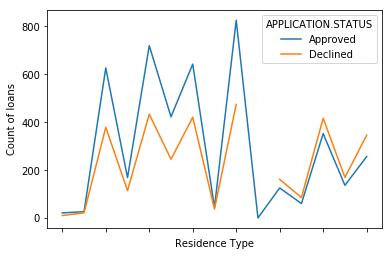

In [189]:
pd.pivot_table(data=df,index='RESIDENCE.TYPE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=False, aggfunc='count').plot()
plt.xlabel('Residence Type')
plt.ylabel('Count of loans')

Text(0,0.5,'Count of loans')

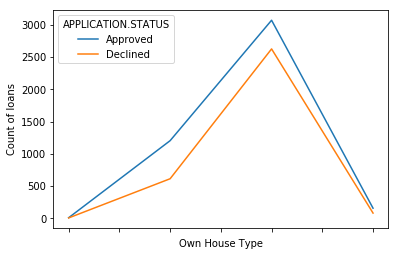

In [197]:
pd.pivot_table(data=df,index='OWN.HOUSE.TYPE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=False, aggfunc='count').plot()
plt.xlabel('Own House Type')
labels = df['OWN.HOUSE.TYPE'].unique()
plt.ylabel('Count of loans')


Text(0,0.5,'Count of loans')

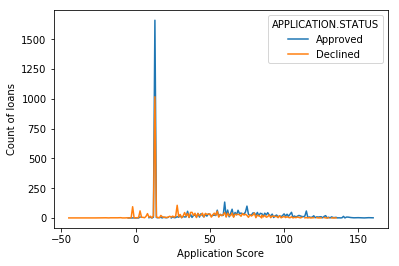

In [205]:
pd.pivot_table(data=df,index='APPLICATION.SCORE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=False, aggfunc='count').plot()
plt.xlabel('Application Score')
labels = df['OWN.HOUSE.TYPE'].unique()
plt.ylabel('Count of loans')

Text(0,0.5,'Count of loans')

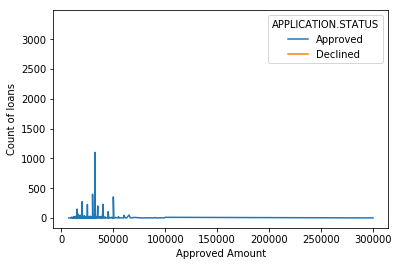

In [200]:
pd.pivot_table(data=df,index='APPROVED.AMOUNT',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=False, aggfunc='count').plot()
plt.xlabel('Approved Amount')
labels = df['OWN.HOUSE.TYPE'].unique()
plt.ylabel('Count of loans')

In [19]:
## Bank Passbook - Not an important variable
df_temp=pd.pivot_table(data=df,index='BANK_PASSBOOK',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
BANK_PASSBOOK,,,,
F,4264,3153,7417,57.49
T,173,169,342,50.58
All,4437,3322,7759,57.19


In [22]:
## PAN is also not a great differentiator
df_temp=pd.pivot_table(data=df,index='PAN',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
AADHAAR,,,,
F,1375,967,2342,58.71
T,3062,2355,5417,56.53
All,4437,3322,7759,57.19


In [24]:
## Aadhaar is also not a good differentiator
df_temp=pd.pivot_table(data=df,index='AADHAAR',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
AADHAAR,,,,
F,1375,967,2342,58.71
T,3062,2355,5417,56.53
All,4437,3322,7759,57.19


In [25]:
## Driving License is also not a good differentiator
df_temp=pd.pivot_table(data=df,index='DRIVING_LICENSE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
DRIVING_LICENSE,,,,
F,3926,2960,6886,57.01
T,511,362,873,58.53
All,4437,3322,7759,57.19


In [26]:
## VoterID is also not a good differentiator
df_temp=pd.pivot_table(data=df,index='VOTER_ID',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
VOTER_ID,,,,
F,3774,2829,6603,57.16
T,663,493,1156,57.35
All,4437,3322,7759,57.19


In [27]:
## somewhat a good indicator.probably defining a term self owned or not would give more insights.
df_temp=pd.pivot_table(data=df,index='OWN.HOUSE.TYPE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
OWN.HOUSE.TYPE,,,,
Children Owned,7,4,11,63.64
Parent Owned,1203,612,1815,66.28
Self Owned,3072,2627,5699,53.90
Spouse Owned,155,79,234,66.24
All,4437,3322,7759,57.19


In [33]:
## PAN Status helps, if not found then low chance of loan
df_temp=pd.pivot_table(data=df,index='PAN.STATUS',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
PAN.STATUS,,,,
ERROR,1043,799,1842,56.62
EXIST,1348,1040,2388,56.45
NOT_FOUND,84,114,198,42.42
Pan Not Submitted,1962,1369,3331,58.90
All,4437,3322,7759,57.19


In [35]:
# Not much insights to gather here.
df_temp=pd.pivot_table(data=df,index='EMPLOY.CONSTITUTION',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
EMPLOY.CONSTITUTION,,,,
PARTNERSHIP,10,7,17,58.82
PRIVATE LIMITED COMPANY,11,10,21,52.38
SALARIED,1983,1426,3409,58.17
SELF-EMPLOYED,2428,1877,4305,56.40
TRUST,5,2,7,71.43
All,4437,3322,7759,57.19


In [37]:
df_temp=pd.pivot_table(data=df,index='STATE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
STATE,,,,
ANDHRA PRADESH,339.0,363.0,702,48.29
ASSAM,23.0,16.0,39,58.97
BIHAR,1.0,NaN,1,100.00
CHHATTISGARH,140.0,76.0,216,64.81
DELHI,160.0,118.0,278,57.55
GUJARAT,791.0,444.0,1235,64.05
HARYANA,7.0,19.0,26,26.92
KARNATAKA,130.0,173.0,303,42.90
MADHYA PRADESH,540.0,282.0,822,65.69


In [42]:
# Rented Owners have low loan approval rates.
df_temp=pd.pivot_table(data=df,index='RESIDENCE.TYPE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
RESIDENCE.TYPE,,,,
COMPANY PROVIDED-FLAT,22.0,11.0,33,66.67
COMPANY PROVIDED-HOUSE,27.0,22.0,49,55.10
OWNED-BUNGLOW,627.0,379.0,1006,62.33
OWNED-CHAWL,169.0,115.0,284,59.51
OWNED-FLAT,720.0,434.0,1154,62.39
OWNED-PENTHOUSE,423.0,246.0,669,63.23
OWNED-ROWHOUSE,643.0,421.0,1064,60.43
PARENT OWNED-FLAT,45.0,38.0,83,54.22
PARENT OWNED-HOUSE,826.0,475.0,1301,63.49


In [43]:
# Lower Education levels have low loan approval rates.
df_temp=pd.pivot_table(data=df,index='EDUCATION',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
EDUCATION,,,,
DOCTORATE,8,4,12,66.67
GRADUATE,2505,1752,4257,58.84
OTHERS,637,590,1227,51.92
POST-GRADUATE,255,164,419,60.86
PROFESSIONAL,18,14,32,56.25
UNDER GRADUATE,1014,798,1812,55.96
All,4437,3322,7759,57.19


In [46]:
# married person have high loan approval rates.
df_temp=pd.pivot_table(data=df,index='MARITAL.STATUS',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
MARITAL.STATUS,,,,
Married,3629,2628,6257,58.00
Single,808,694,1502,53.79
All,4437,3322,7759,57.19


In [47]:
# Gender is not quite intuitive feature
df_temp=pd.pivot_table(data=df,index='GENDER',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
GENDER,,,,
Female,737,533,1270,58.03
Male,3700,2789,6489,57.02
All,4437,3322,7759,57.19


In [48]:
# Gender is not quite intuitive feature
df_temp=pd.pivot_table(data=df,index='CURRENT.STAGE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
CURRENT.STAGE,,,,
APRV,1107.0,NaN,1107,100.00
DCLN,NaN,2123.0,2123,NaN
INV_GNR,856.0,NaN,856,100.00
LOS_BDE,86.0,NaN,86,100.00
LOS_DISB,729.0,1.0,730,99.86
LOS_ERROR,5.0,1.0,6,83.33
PD_DE,1359.0,1197.0,2556,53.17
SRNV,295.0,NaN,295,100.00
All,4437.0,3322.0,7759,57.19


In [53]:
# Gender is not quite intuitive feature
df_temp=pd.pivot_table(data=df,index='QUEUE.ID',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
QUEUE.ID,,,,
Straight Through Process,3454,1918,5372,64.30
Under.Writer,983,1404,2387,41.18
All,4437,3322,7759,57.19


In [52]:
# Straight through Process
df_temp=pd.pivot_table(data=df,index='QUEUE.ID',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
QUEUE.ID,,,,
Straight Through Process,3454,1918,5372,64.30
Under.Writer,983,1404,2387,41.18
All,4437,3322,7759,57.19


In [54]:
### Application score would help 
df_temp=pd.pivot_table(data=df,index='APPLICATION.SCORE',values='APPLICATION.ID',columns='APPLICATION.STATUS',margins=True, aggfunc='count')
df_temp['percent']=round(df_temp['Approved']*100/df_temp['All'],2)
df_temp

APPLICATION.STATUS,Approved,Declined,All,percent
APPLICATION.SCORE,,,,
-45.0,NaN,1.0,1,NaN
-32.0,NaN,1.0,1,NaN
-27.0,NaN,1.0,1,NaN
-22.0,NaN,2.0,2,NaN
-20.0,NaN,2.0,2,NaN
-18.0,NaN,1.0,1,NaN
-17.0,NaN,2.0,2,NaN
-15.0,1.0,2.0,3,33.33
-12.0,NaN,2.0,2,NaN


### Model Preparation

In [214]:
def featureselection():
    df=pd.read_excel('customer_dataset.xlsx')    
    df.drop(['APPLICATION.ID','DSA.ID','DEALER.ID','ZIP.CODE','PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','PRIMARY.ASSET.MODELNO'],axis=1,inplace=True)
    df=df[['APPLICATION.SCORE','CURRENT.STAGE','MARITAL.STATUS','EDUCATION','RESIDENCE.TYPE','PAN.STATUS','OWN.HOUSE.TYPE','APPLICATION.STATUS','APPROVED.AMOUNT']]
    df_enc=pd.get_dummies(df,columns=['CURRENT.STAGE','MARITAL.STATUS','EDUCATION','RESIDENCE.TYPE','PAN.STATUS','OWN.HOUSE.TYPE','APPLICATION.STATUS'],drop_first=True)
    x=df_enc.drop(['APPLICATION.STATUS_Declined'],axis=1)
    y=df_enc['APPLICATION.STATUS_Declined']
    return x,y

In [215]:
x,y=featureselection()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=30)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=.3,random_state=26)

model=GaussianNB()
y_valid_pred=model.fit(x_train,y_train).predict(x_valid)
print("Validation Dataset")
print(classification_report(y_valid, y_valid_pred))

print("Test Dataset")
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

Validation Dataset
             precision    recall  f1-score   support

          0       1.00      0.76      0.86      1043
          1       0.76      1.00      0.86       820

avg / total       0.89      0.86      0.86      1863

Test Dataset
             precision    recall  f1-score   support

          0       1.00      0.76      0.86       891
          1       0.75      1.00      0.86       661

avg / total       0.89      0.86      0.86      1552

